### 1. Covid19 확진자 수 변동 추이 시각화

In [2]:
from hossam import load_data
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb

KeyboardInterrupt: 

In [ ]:
origin = load_data('covid19_active')
origin.head()

[data] https://data.hossam.kr/data/lab06/covid19_active.xlsx
[desc] 2022년 5월 1일부터 2023년 5월 31일까지 서울과 전국의 Covid19 일일 확진자 수를 기록한 데이터 (출처: 서울시)
[!] Cannot read metadata


,서울시 일일 확진,전국 일일 확진
기준일,,
2023-05-31,5987.0,24411.0
2023-05-30,3326.0,13529.0
2023-05-29,1393.0,6868.0
2023-05-28,1393.0,6868.0
2023-05-27,4078.0,17796.0


In [ ]:
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"
#"./NotoSansKR-Regular.ttf"
    # ↑: 한글 지원하는 폰트파일의 경로
fm.fontManager.addfont(font_path)      
    # ↑: 폰트 글꼴 시스템에 등록
font_prop = fm.FontProperties(fname = font_path)
    # ↑: 폰의 속성 읽어오기
font_name = font_prop.get_name()
    # ↑: 읽어온 속성에서 폰트이름만 추출
    # why? 시스템이 인식하는 폰트 이름은 다 영문으로 
    # 되어있기 때문에 폰트 이름 확인은 필수임
font_name # 글꼴 이름 확인

'Noto Sans KR'

In [ ]:
my_dpi = 120  # 1인치 당 점(픽셀) 수. 이미지 선명도를 결정함
my_font_name = 'Noto Sans KR'  # 시스템에 등록된 글꼴 이름
my_theme = 'dark'              # 그림 스타일 지전

sb.set_theme(style = my_theme) # seaborn 스타일 (화풍설정)

plt.rcParams['font.family'] = my_font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 16          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

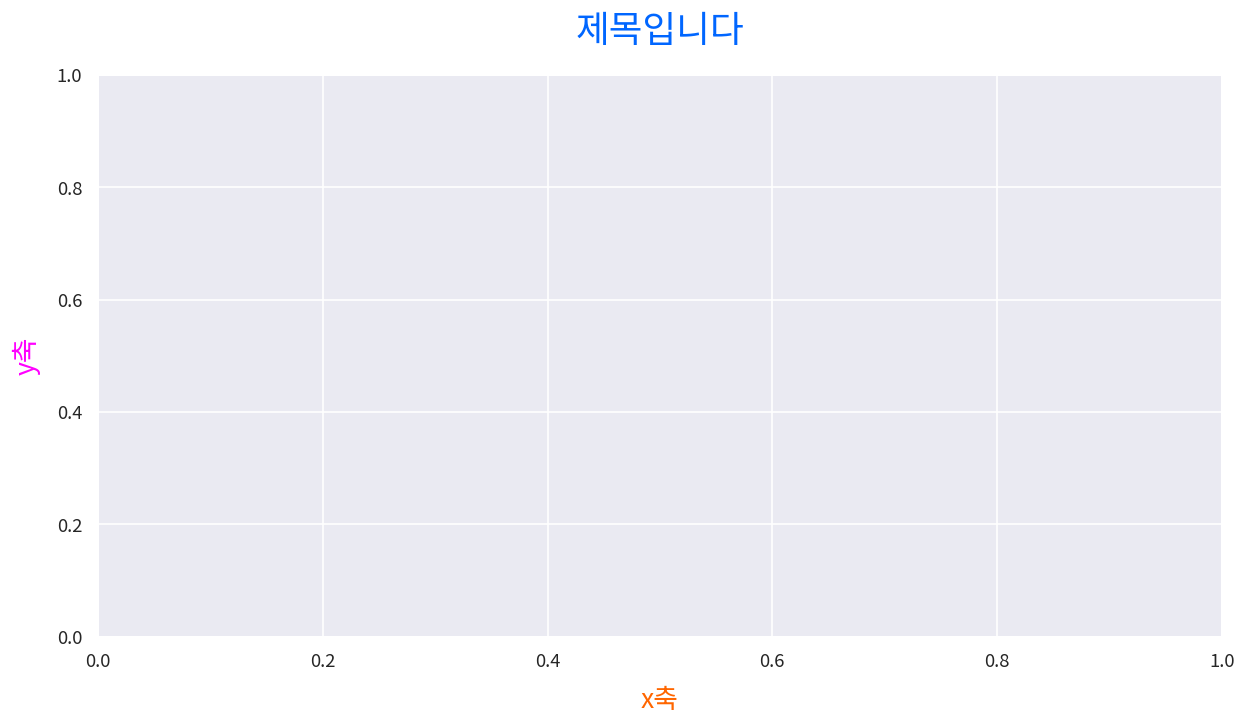

In [ ]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280     # 그래프 가로크기
height_px = 760     # 그래프 세로크기
rows = 1            # 도화지의 행 수
cols = 1            # 도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프의 도화지 상태 확인용 테스트 코드
#print(ax)

# 2) 그래프 그리기: seaborn 사용
# ...

# 3) 그래프 꾸미기: 도화지(ax)에 직접 적용
    # color: 글자 색상 (기본값: black)
    # fontsize: 글자 크기 (기본값: 위에서 정한 plt.rcParams['font_size] 설정)
    # pad, labelpad: 그래프와 글자 간 간격
    # fontweight: 글자 굵기 (100 ~ 1000 사이 100단위 값) 
        # 글꼴이 지원하는 경우만 적용됨
ax.set_title(
    "제목입니다", color = "#0066ff", 
    fontsize = 22, fontweight = 1000, pad = 20
)
ax.set_xlabel("x축", color = "#ff6600", fontsize = 16, labelpad = 10)
ax.set_ylabel("y축", color = "#ff00ff", fontsize = 16, labelpad = 10)

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료
#-------------------------------------------------------
# ↑: 코드로 그림 그릴 때 마다 2~4는 적기 (3번은 생략 가능)
# ↑: 출력에서 저장 안할거면 다운로드 옵션 줄 지워도 됨

### 시계열 그리기
##### x 좌표 직접 생성

In [ ]:
x_index = origin.index.sort_values()
x = list(range(0, len(x_index), 30))
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]

##### x 좌표에 해당하는 날짜만 추출

In [ ]:
xticks = []

for i in x:
    xticks.append(x_index[i].strftime('%y/%m/%d'))

print(xticks)

['23/05/31', '23/05/01', '23/04/01', '23/03/02', '23/01/31', '23/01/01', '22/12/02', '22/11/02', '22/10/03', '22/09/03', '22/08/04', '22/07/05', '22/06/05', '22/05/06']


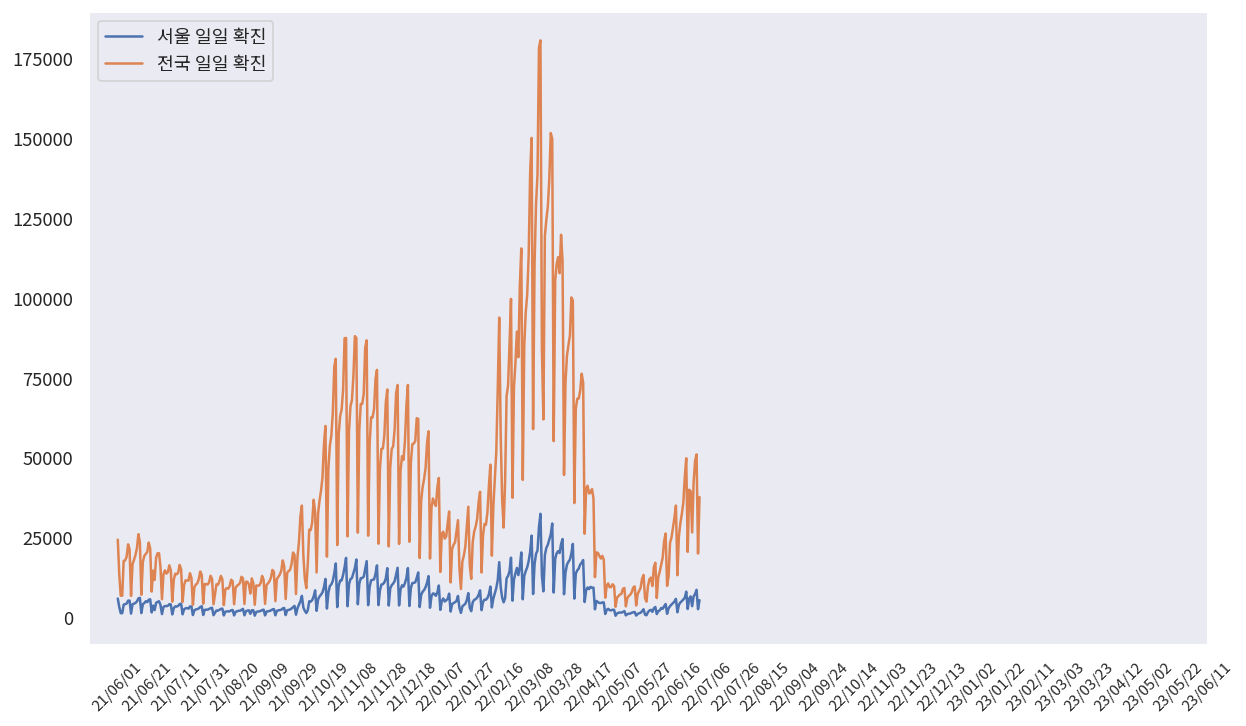

In [ ]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 760     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(data = origin['서울시 일일 확진'].values, label = '서울 일일 확진')
sb.lineplot(data = origin['전국 일일 확진'].values, label = '전국 일일 확진')

# 3) 그래프 꾸미기: 
ax.grid(True)
ax.set_xticks(x, xticks, rotation = 45, fontsize = 9) # 글자 각도 지정
ax.legend(loc = 'upper left')

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 그래프 분석 (생각보다 시시콜콜 한 것 까지 다 적어야 됨)

#### 전반적 흐름
- 서울과 전국 모두 2022년 5월부터 2023년 5월까지 다중 파동(Multi-wave) 형태의 시계열 패턴을 보인다.
- 전국 확진자 규모가 서울 확진자보다 전 기간 동안 항상 절대적으로 크게 나타난다.
- 전체 기간 동안 (2022년 5~8월 → 2022년 9~12월 → 2023년 1월 → 2023년 4~5월) 여러 번의 증가와 감소가 반복된다.

#### 각 지역의 상대적 수준
- 전국 확진자 수는 대부분의 시점에서 서울보다 5~10배 이상 높게 나타난다.
- 2022년 8월, 2023년 1월 등의 주요 파동 구간에서 전국 확진자 변동 폭은 서울보다 훨씬 크며 스파이크가 두드러진다.
- 서울은 전국과 유사한 증감 시점을 공유하지만 규모와 변동 폭은 상대적으로 낮고 완만하다.

#### 초기 구간 (2022년 5~6월)
- 서울은 약 1천~5천 명 수준의 비교적 낮은 확진자 수가 반복된다.
- 전국은 같은 기간 약 5천~2만 명대 수준으로 서울보다 높은 상태에서 출발한다.

#### 첫 번째 큰 증가 구간 (2022년 7월~2022년 8월)
- 2022년 7월부터 서울·전국 모두 급격한 상승세를 보인다.
- 서울은 약 2만~3만 명대까지 증가하며 주요 파동을 형성한다.
- 전국은 같은 시기에 10만~18만 명대까지 급증하여 가장 큰 파동을 만든다.

#### 그 이후 감소 및 재상승 구간 (2022년 9~12월)
- 2022년 9~10월에는 큰 파동 이후 확진자 수가 전반적으로 감소한다.
- 이후 2022년 11~12월에 다시 소규모 재상승이 나타나며 전국은 약 3만~7만 명대 범위를 보인다.
- 이 재상승은 8월 파동보다 규모는 작지만 분명한 두 번째 파동을 형성한다.

#### 최댓값(가장 큰 피크) — (2022년 8월 10~20일)
- 전국 확진자는 2022년 8월 17일을 중심으로 약 18만 명 이상으로 최고점을 기록한다.
- 서울 확진자 수 역시 같은 시기에 약 3만 명대 중반으로 최고점을 기록한다.
- 전국의 최대 피크는 서울 최대 피크보다 약 5배 이상 높은 절대 규모를 보인다.

#### 피크 형태의 특징
- 2022년 8월 피크 구간에서 전국 확진자는 단기간 급등 후 급락하는 강한 스파이크 형태를 보인다.
- 서울은 동일한 시점에서도 전국보다 평탄하고 완만한 정점을 보인다.
- 해당 시기 전국의 단기 요동(weekly pattern)이 매우 크게 나타난다.

#### 요일 효과(Weekly pattern)
- 2022년 5월~2023년 5월 전체 기간 동안 서울·전국 모두 요일별 패턴으로 보이는 주기적 요동이 지속된다.
- 특히 2022년 7~8월, 2023년 1월 등 파동 구간에서 전국은 주 단위 반복 변동이 매우 뚜렷하다.
- 서울의 요동은 전국보다 상대적으로 작지만 동일한 패턴을 보인다.

#### 대규모 피크 후 구간 (2022년 9월~12월)
- 2022년 9월 이후 전국 확진자는 빠르게 하락하여 약 2만~4만 명대 수준으로 이동한다.
- 서울도 같은 기간 1천~5천 명대 사이에서 안정된다.
- 이후에도 전국은 서울보다 훨씬 높은 변동폭을 보이며 소규모 파동이 반복된다.

#### 그래프 말미 구간 (2023년 1~5월)
- 2023년 1월 초 전국 확진자는 약 8만 명대까지 다시 증가하는 중규모 파동을 보인다.
- 이후 2023년 4~5월에는 2만~5만 명대의 소규모 파동이 나타난다.
- 서울은 같은 기간 5천~1만 명 이하에서 변동하며 상대적으로 낮은 수준을 유지한다.

#### 서울과 전국의 동조성(Correlation)
- 전체 기간 동안 서울과 전국의 증감 방향은 대부분 동일하게 움직인다.
- 특히 2022년 7~8월, 2023년 1월 파동 구간에서 강한 동조화가 관찰된다.
- 주요 파동 시점은 항상 거의 동일한 날짜 범위에서 발생한다.

#### 변동성(Volatility)
- 전국 확진자는 전체 기간에서 높은 분산과 큰 변동성을 지속적으로 보인다.
- 서울 확진자는 전국보다 안정적이며 상대적으로 좁은 범위의 변동을 보인다.
- 전국의 단기 급등락(스파이크)은 서울보다 규모·빈도 모두 더 크다.#### 최댓값(가장 큰 피크) — (2022년 8월 초~중순)
- 전국 확진자는 2022년 8월경 그래프 전체에서 최대치(약 18만 명 이상)에 도달한다.
- 서울 확진자 수도 같은 시점에 약 3만 명대 중반으로 최고점을 기록한다.
- 전국의 최대 피크는 서울 최대 피크보다 약 5배 이상 높다.

#### 피크 형태의 특징
- 2022년 8월 피크 구간에서 전국 확진자는 단기간 급등 후 급락하는 강한 스파이크 형태를 보인다.
- 서울은 동일한 시점에서도 전국보다 평탄하고 완만한 정점을 보인다.
- 해당 시기 전국의 단기 요동(weekly pattern)이 매우 크게 나타난다.

#### 요일 효과(Weekly pattern)
- 전체 기간(2021년 말~2023년 중반)에 걸쳐 서울·전국 모두 요일별 패턴으로 보이는 주기적 요동이 지속적으로 나타난다.
- 특히 2022년 상·하반기 파동 구간에서 전국은 주 단위 반복적 감소·증가가 매우 뚜렷하다.
- 서울의 요동은 전국보다 상대적으로 작지만 같은 패턴이 존재한다.

#### 대규모 피크 후 구간 (2022년 9~12월)
- 2022년 9월 이후 전국 확진자는 빠르게 하락해 약 2만~4만 명대 수준으로 이동한다.
- 서울도 같은 기간 1천~5천 명대에서 안정되며 낮은 수준을 유지한다.
- 이 기간 중 전국은 간헐적으로 수만 명대의 작은 파동을 반복하며 서울보다 높은 변동폭을 유지한다.

#### 그래프 말미 구간 (2023년 1~6월)
- 2023년 초~중반 전국 확진자는 약 3만~5만 명대에서 작은 파동을 보인다.
- 서울은 같은 기간 약 5천~1만 명 이하 범위에서 움직인다.
- 마지막 시점까지도 두 지역 간 확진자 수의 절대적 차이는 크게 유지된다.

#### 서울과 전국의 동조성(Correlation)
- 전체 기간 동안 서울과 전국의 증감 방향은 대부분 동일하게 움직인다.
- 특히 2022년 1~3월, 7~9월의 대규모 파동 구간에서 강한 동조화가 관찰된다.
- 주요 파동 시점은 항상 거의 동일한 날짜 범위에서 발생한다.

#### 변동성(Volatility)
- 전국 확진자는 전체 기간에서 높은 분산과 큰 변동성을 지속적으로 보인다.
- 서울 확진자는 전국보다 안정적이며 상대적으로 좁은 범위의 변동을 한다.
- 전국의 단기 급등락(스파이크)은 서울보다 규모·빈도 모두 더 크다.


## 2. 비트코인 시세변동 추이 시각화

### 데이터 가져오기

In [ ]:
df2 = load_data('bitcoin')
df2

[data] https://data.hossam.kr/data/lab06/bitcoin.xlsx
[desc] 2021년 06월 01일부터 2023년 06월 30일까지의 비트코인 시세 데이터 (출처: bitcoin.com)
[!] Cannot read metadata


,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...
2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199


### 시가 확인

In [ ]:
start = list(df2['시가'].values)

print(len(start))
print(start[:5])

760
[np.float64(37294.3), np.float64(36687.7), np.float64(37555.7), np.float64(39191.4), np.float64(36841.2)]


### 종가 확인

In [ ]:
end = list(df2['종가'].values)

print(len(end))
print(end[:5])


760
[np.float64(36687.6), np.float64(37555.8), np.float64(39187.3), np.float64(36851.3), np.float64(35520.0)]


### 20일 간격 인덱스 생성

In [ ]:
x = list(range(0, len(start), 20))

print(len(x))
print(x)

38
[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740]


### 20일 간격 라벨 추출하기

In [ ]:
xticks = []

for i in x:
    xticks.append(df2.index[i].strftime('%y/%m/%d'))

xticks[:5]

['21/06/01', '21/06/21', '21/07/11', '21/07/31', '21/08/20']

### 시각화

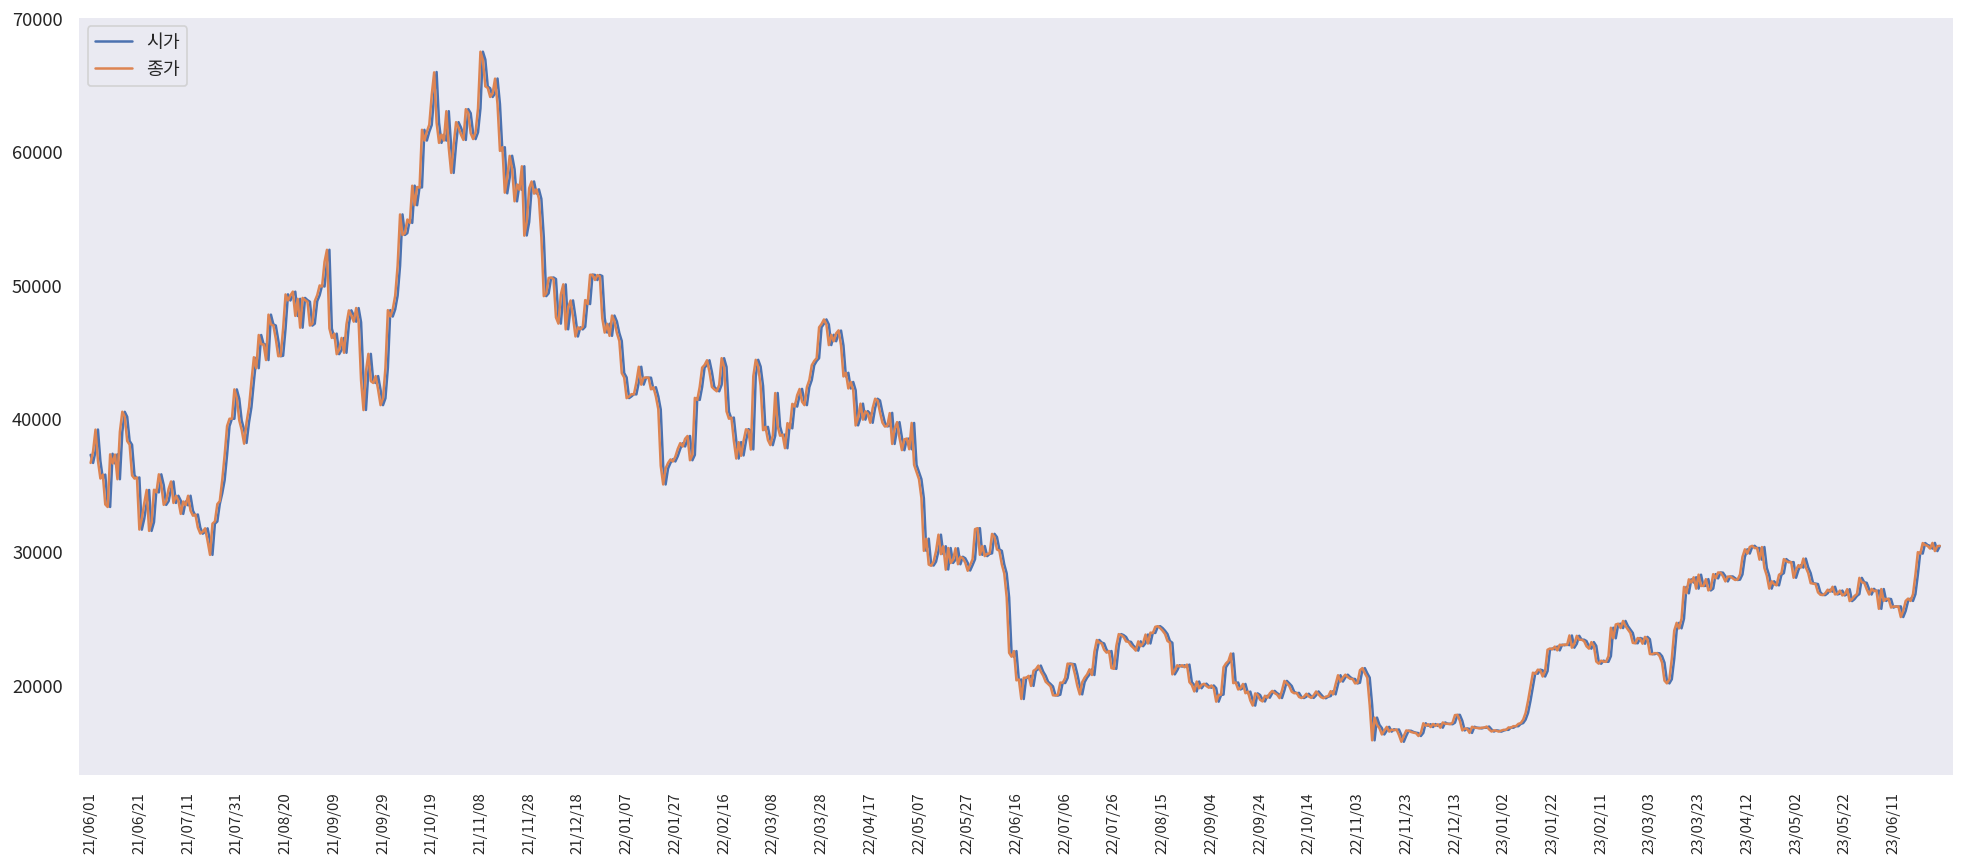

In [ ]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 2000
height_px = 900
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(data = start, label = '시가')
sb.lineplot(data = end, label = '종가')

# 3) 그래프 꾸미기: 
ax.grid(True)
ax.set_xticks(x, xticks, rotation = 90, fontsize = 9) # 글자 각도 지정
ax.legend(loc = 'upper left')
ax.set_xlim([-5, len(start) + 5])

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 그래프 분석

#### 전체 기간 개요
- 데이터는 2021년 중반부터 2023년 중반까지 약 2년의 시계열로 구성되어 있다.
- 전체 기간 동안 가격은 여러 차례 큰 상승과 큰 하락이 반복되며, 단순한 단일 추세가 아닌 다중 파동 형태를 보인다.
- 시가와 종가는 기간 전체에서 거의 동일한 방향성을 가지며 동조적으로 움직인다.

#### 주요 시점별 흐름
- **2021년 중반~후반:** 그래프 초반부에서 비교적 높은 가격대가 유지되며, 그래프 상단 영역에 위치한다.
- **2021년 말~2022년 초:** 가격이 점진적으로 하락하며 전체적인 흐름이 아래쪽으로 이동한다.
- **2022년 중반:** 그래프에서 가장 낮은 구간 중 하나가 이 시점에 나타난다. 시가와 종가 모두 그래프의 하단부 근처에서 움직인다.
- **2022년 말~2023년 초:** 다시 완만한 반등 구간이 나타나며 그래프가 중간 높이까지 되돌아온다.
- **2023년 봄~초여름:** 가격이 다시 점진적으로 상승하여 중간~상단 영역에 위치하며 그래프 말미에서 회복 흐름이 보인다.

#### 가격 수준에 대한 대략적 사실
- 그래프 상단부(가장 높은 영역)는 전체 기간에서 일부 시점에만 나타나며, 이 구간은 **최고점에 가까운 가격대**로 보인다.
- 그래프 중간 영역은 전체 기간 중 가장 넓게 분포하며, **평균적인 가격 수준**이 이 근처에 위치한다.
- 그래프 하단부(가장 낮은 영역)는 몇 개의 특정 시점에서 짧게 나타나며, 이는 **연중 최저 수준의 가격대**에 해당한다.
- 시가와 종가 간의 차이는 하루 단위에서는 크게 벌어지지 않는 경우가 많지만, 특정 시기에는 하루 변동 폭이 확연히 넓어진다.

#### 상승 구간의 시점 및 특징
- **2021년 하반기 초입:** 20일 간격 점들이 그래프 상단으로 향하며 명확한 상승 흐름을 보인다.
- **2022년 말~2023년 1분기:** 저점에서부터 점들이 단계적으로 위쪽으로 배치되며 회복세를 형성한다.
- 상승 구간에서는 20일 단위 점의 위치 변화 폭이 커지며 기울기가 비교적 가파르게 나타난다.

#### 하락 구간의 시점 및 특징
- **2021년 말~2022년 중반:** 그래프에서 가장 분명한 하락 흐름이 나타나는 시기이며, 점들의 위치가 지속적으로 아래쪽으로 이동한다.
- 하락 구간에서는 시가와 종가 모두 이전 기간 대비 낮은 위치를 반복적으로 기록하며 장기간 하향 패턴이 지속된다.
- 일부 구간에서는 20일 간격 점 사이의 거리도 커져 급격한 가격 이동이 있었음을 보여준다.

#### 횡보(안정) 구간의 시점 및 특징
- **2022년 초~중반 일부 구간:** 시가와 종가 모두 일정한 높이에서 좁은 폭으로 움직이며 비교적 안정적인 패턴을 보인다.
- **2023년 초반 일부 기간:** 반등 이후 가격이 일정 범위 내에서 반복적으로 오르내리는 모습을 보인다.
- 횡보 구간에서는 20일 간격 점들의 높이가 비슷하게 유지된다.

#### 시가·종가 관계의 시점적 특징
- 거의 모든 시점에서 시가와 종가는 서로 가깝게 위치하여 하루 변동 폭이 지나치게 크지 않음을 보여준다.
- 특정 변동성 큰 기간(예: 하락 바닥 직전, 급등 직전)에는 시가와 종가의 일중 간격이 더 넓어지는 패턴이 나타난다.
- 두 선의 위치가 지속적으로 교차하거나 가까운 경우가 많아, 시가와 종가의 일별 패턴이 상당히 비슷한 구조를 가진다.

#### 변동성 측면에서의 시점별 특징
- **급격한 변동 시기:** 그래프 기울기가 급격하게 변하는 구간(2021년 말~2022년 중반, 일부 반등 구간)에서 변동 폭이 크다.
- **안정된 시기:** 그래프가 완만한 곡선을 그리며 점 차이가 작아지는 구간(2022년 중반 일부, 2023년 초 일부)에서 단기 변동성은 줄어든다.
- 전체적으로는 상승·하락·횡보가 모두 반복되며, 변동성 수준이 일정하지 않고 시기별로 크게 달라진다.

#### 전체 흐름 종합
- 최고점, 중간값, 최저점이 여러 번 반복되면서 다중 파동 구조가 뚜렷하게 나타난다.
- 시간 흐름에 따라 그래프 상단 → 하단 → 중간 → 상단으로 이동하는 모습이 나타나며, 전체 기간이 명확하게 여러 국면으로 구분된다.
- 시가와 종가 모두 동일한 흐름을 보이므로 단일 자산의 가격 움직임이 일관되게 반영된 그래프임을 확인할 수 있다.


## 10. 연습문제 3개:

> 출처: ADsP 기출

필요조건: 분석으로 알아낼 수 있는 객관적 사실들 서술 in 모든문제

#### 문제 1:

In [ ]:
# 나이: 수치형, 임금: 수치형

# 1. 패키지 참조:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [ ]:
# 2. 그래프 초기화
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 10          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [ ]:
# 데이터 로드하기
origin = load_data('wage')
origin.head()

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [ ]:
# 4. 데이터 전처리: boject -> catrgory
df1 = origin.astype(
    {'education': 'category'}
)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   object  
 3   race        3000 non-null   object  
 4   education   3000 non-null   category
 5   region      3000 non-null   object  
 6   jobclass    3000 non-null   object  
 7   health      3000 non-null   object  
 8   health_ins  3000 non-null   object  
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 237.6+ KB


### 5. EDA: 

pairplot 객체를 이용해서 두개의 수치형 변수(wage, age)를 선택 후 

교육 수준 별로 그룹화해서 스캔해보자

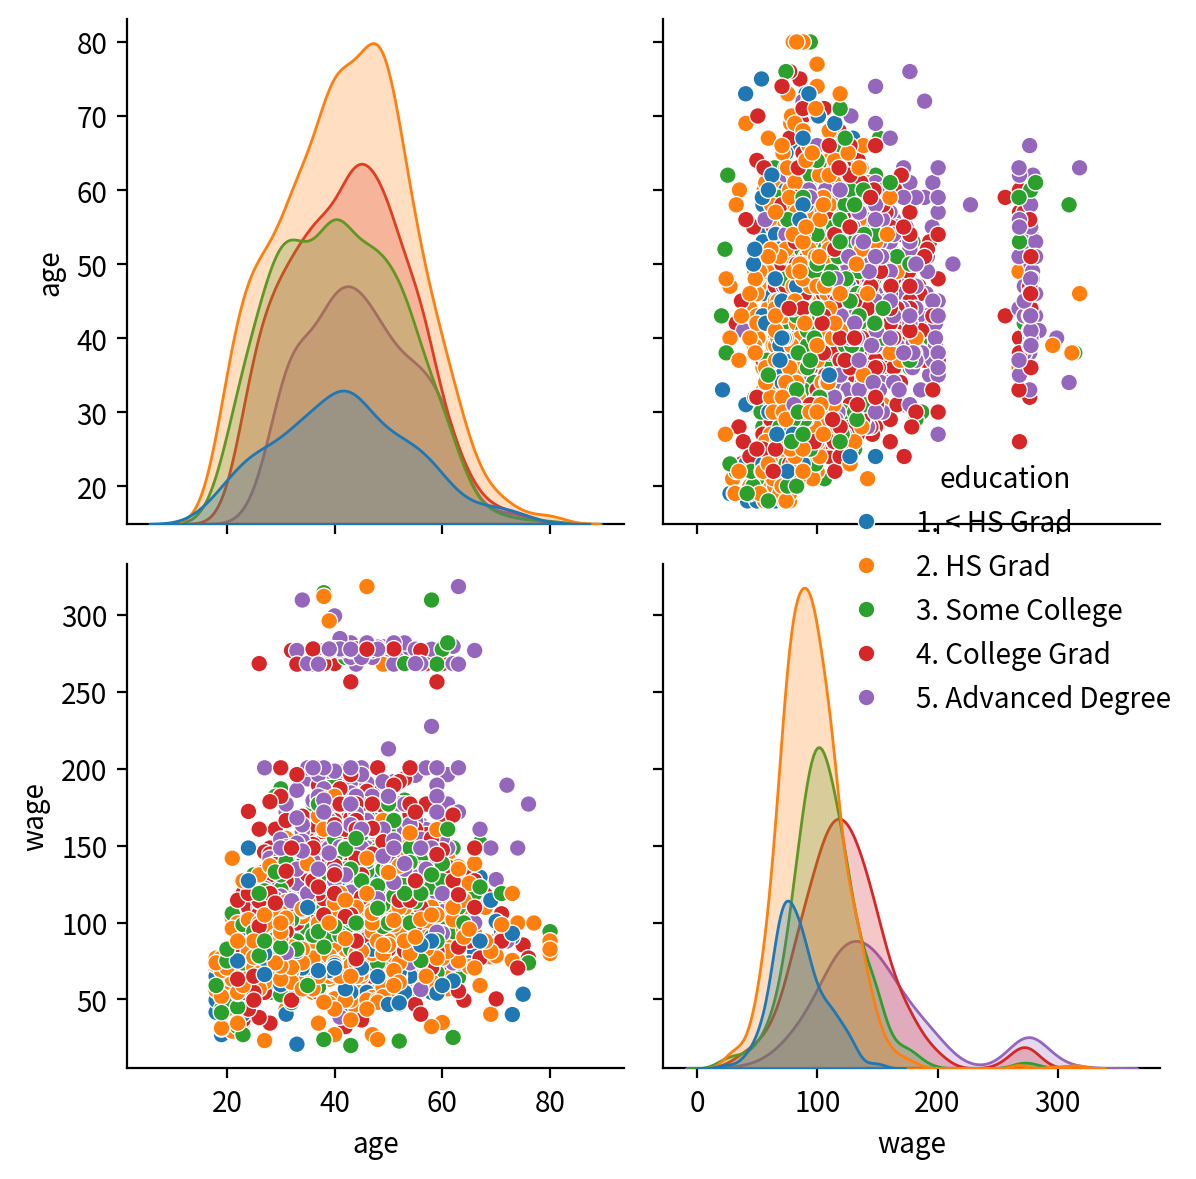

In [ ]:
# 1) 그래프 초기화
width_px = 1200             # 그래프 가로
height_px = 1200            # 그래프 세로             
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) Pair Plot 그래프 그리기
g = sb.pairplot(df1, hue = 'education', diag_kind = 'kde',
                x_vars = ['age', 'wage'],
                y_vars = ['age', 'wage'])
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

# 3) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 알 수 있는 사실

1. `age와 education`
   - 경향성: 고등학교 졸업 수준의 교육을 받은 집단에서 제일 많은 인구 수와 넓은 나이 범위를 포용한다
   - 디테일 비교는 hist+KDE plotting 으로 해보자

2. `wage와 education`
   - 대부분의 사람들은 HS Grad 교육집단에 속해있다.
   - 전반적으로 모든 교육수준의 집단에서 그래프 개형이 오른쪽 꼬리를 보임.
     - 이로 미루어 보아 `임금(평균) > 임금(중앙값)`의 성격은 교육수준에 영향을 크게 받지 않아 보인다.
   - 각 교육수준마다의 peak 값은 교육 수준이 높을 수록 커지는 정비례 관계를 보여준다.
   - 꼬리부분의 임금 peak 는 교육 수준이 높을수록 더 그 값이 커짐을 보인다.

3. pairplot으로 스캔 결과:
   - 임금과 교육수준 간 상관관계는 눈에 잘 드러나는 편이지만, 
   - 나이와 교육수준 간 상관관계의 유무를 알기 위해서는 다른 방식의 시각화로 더 분석이 필요해 보인다
   - 따라서 나이와 교육수준 비교를 위해 hist+KDE를 써보자

In [ ]:
# 교육수준 범주 확인:

educated_degree = sorted(list(df1['education'].unique()))
educated_degree

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

### 6. 교육수준과 나이 간 상관관계
- use: hist+KDE plotting method to explore 디테일한 상관관계 분석: 

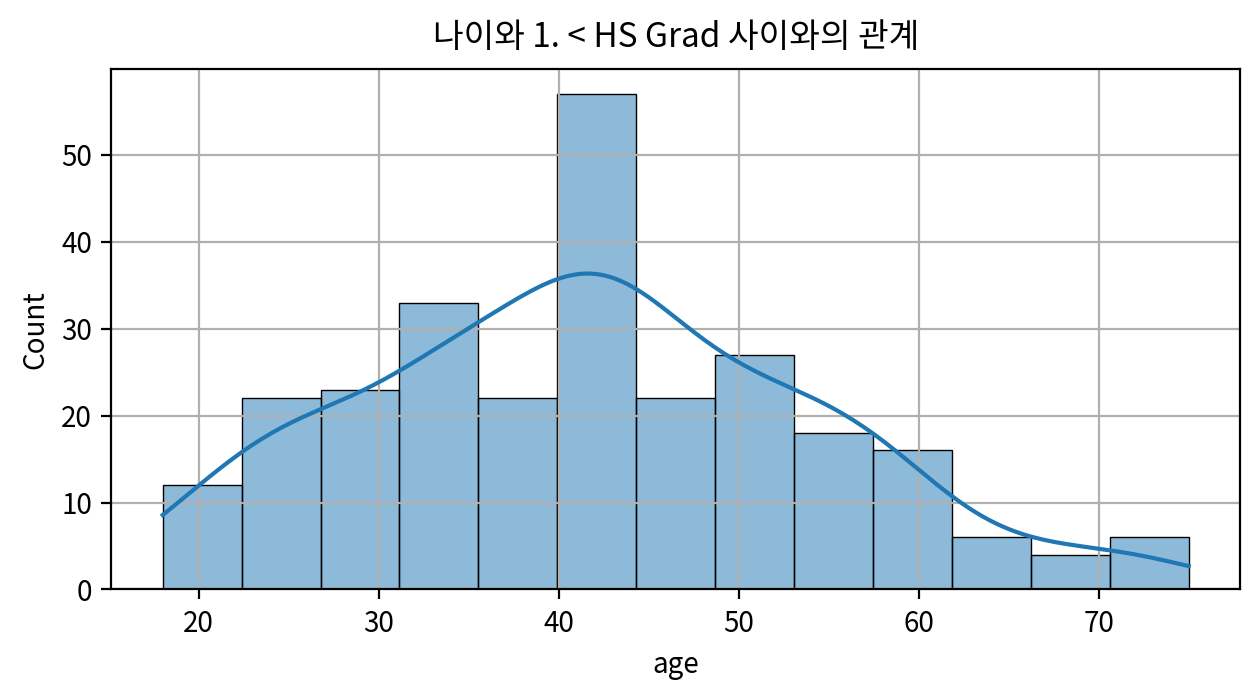

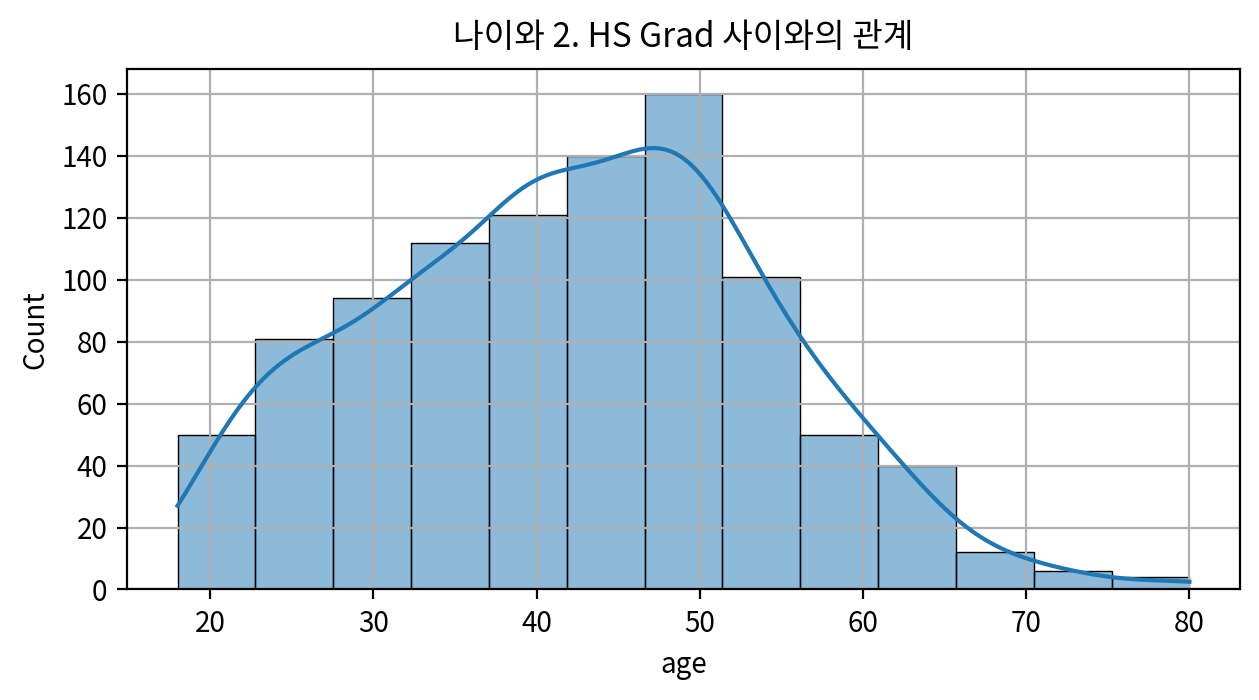

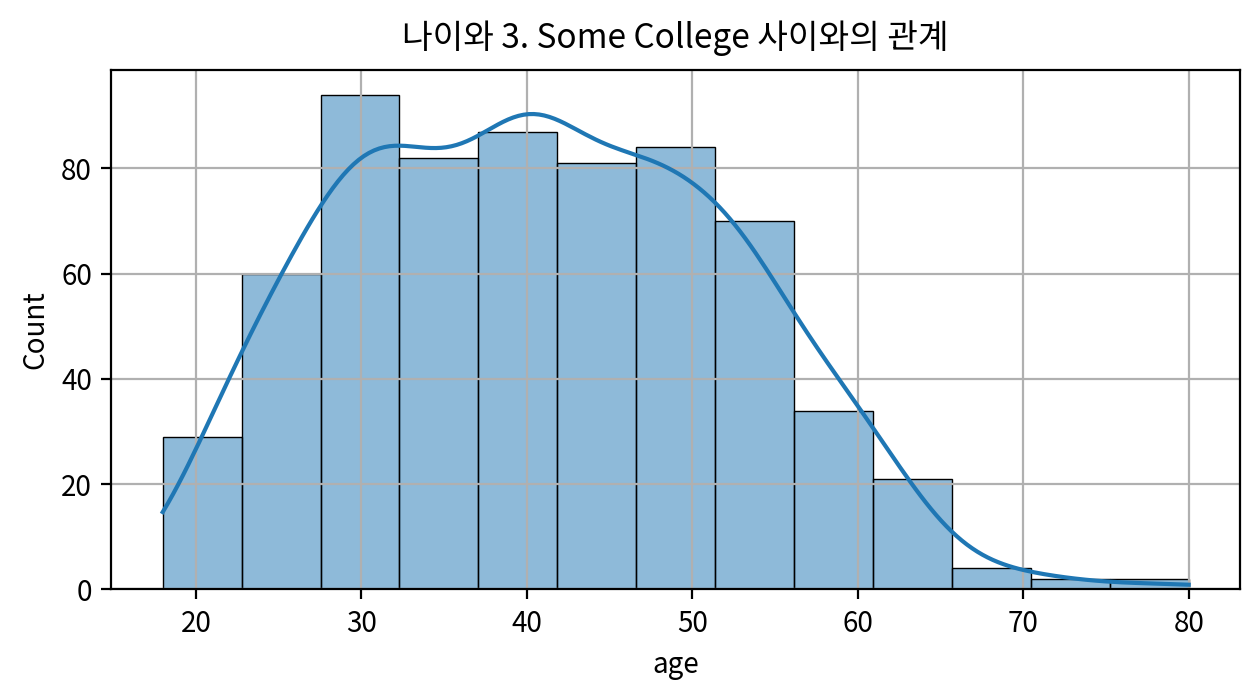

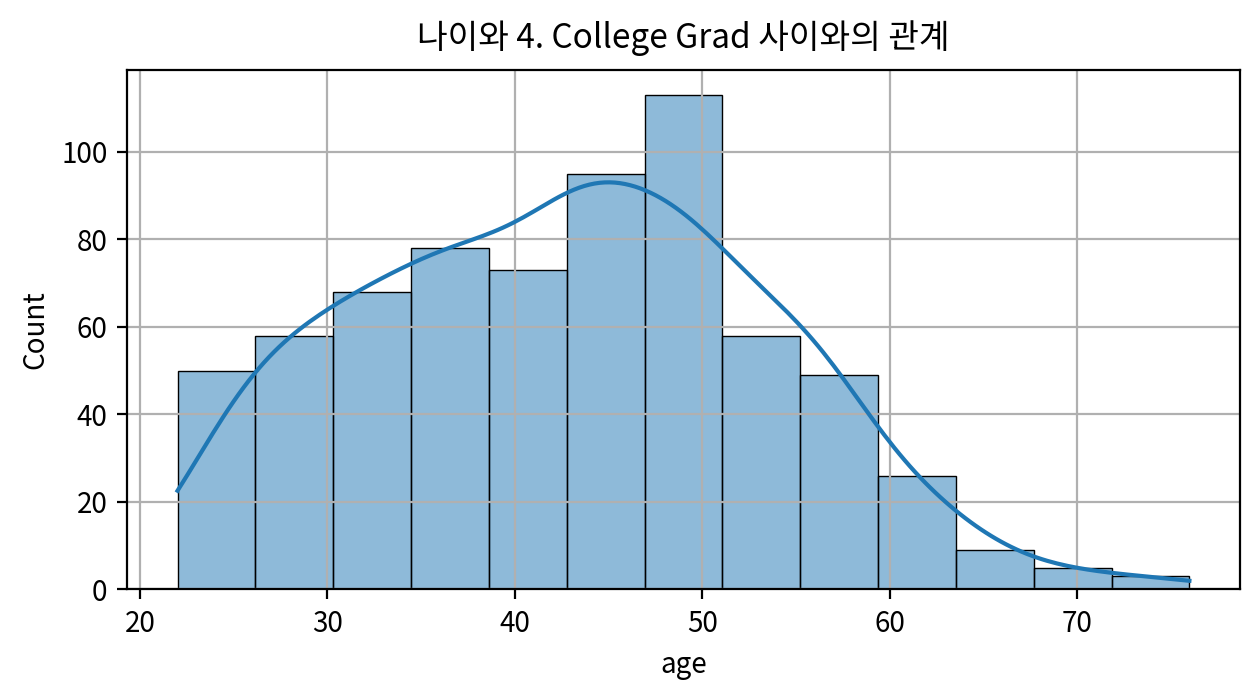

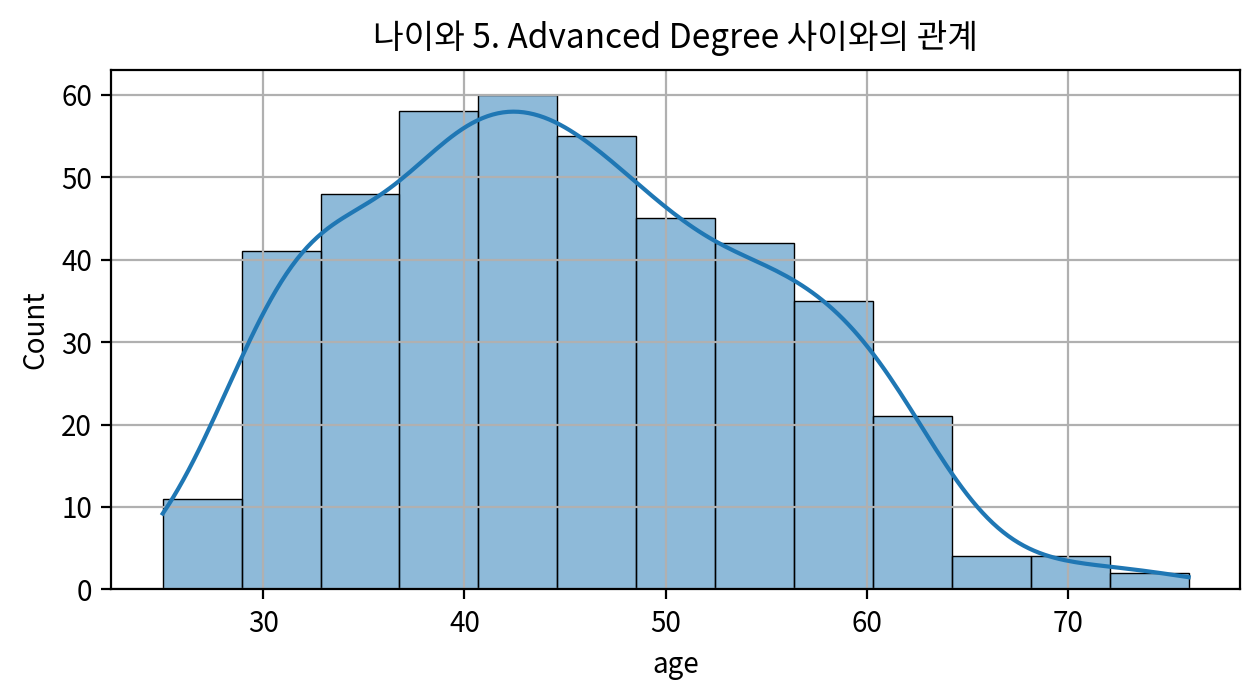

In [ ]:
# age 필드 지정, education 기준으로, count 집계

bins_count = 13

for e in educated_degree:
    edf = df1.query('education == @e')

    # 1) 그래프 초기화 
    width_px = 1280             # 그래프 가로 크기
    height_px = 720             # 그래프 세로 크기
    rows = 1                    # 그래프 행 수
    cols = 1                    # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
    
    
    # 2) Hist+KDE 그리기
    sb.histplot(data = edf, x = 'age', bins = bins_count,
               edgecolor = "#000000", linewidth = 0.5, kde=True)
    
    # 3) 그래프 꾸미기: 
    ax.set_title("나이와 %s 사이와의 관계" % e, pad = 8, fontsize = 12)
    #ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
    #ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
    #ax.set_xlim([✅, ✅])       # x축 범위
    #ax.set_ylim([✅, ✅])       # y축 범위
    ax.grid(True)            ㅎ    # 배경, 격자 표시/숨김
    
    # 4) 출력
    #plt.savefig('plot.png', dpi = my_dpi * 2)   # 이미지파일 저장                              # 배경 격자 표시/숨김 (테마별로 다름)
    plt.tight_layout()                          # 여백 제거
    plt.show()                                  # 그래프 화면 출력
    plt.close()                                 # 그래프 작업 종료

### 알 수 있는 사실 btw `age와 education`:

1. < HS grad 교육집단: 
 - 나이 최빈구간: 40~45세, 
 - count(나이 최빈구간) > 50, 
 - 개형 특징: 
   - 최빈구간의 count 수가 두번째로 count수가 큰 구간 대비 2배 이상 큰 수치를 보임 
   - -> 고졸 미만 교육집단의 절반 이상의 사람들은 40~45세 나이구간에 위치 해 있다.
  
2. HS grad 교육집단:
 - 나이 최빈구간: 47~51세, 
 - count(나이 최빈구간) ≒ 160, 
 - 개형 특징: 
   - a gradual increase in its count until 최빈구간 and shows fast drop right before 최빈구간
   - right-tail implicates mean > median

3. Some college 교육집단:
 - 나이 최빈구간: 27~33세, 
 - count(나이 최빈구간) ≒ 88, 
 - 개형 특징: 
   - most of population in 'some college' situates age btw 27~51
   - right-tail implicates mean > median

4. College grad 교육집단:
 - 나이 최빈구간: 47~51세, 
 - count(나이 최빈구간) > 110, 
 - 개형 특징: 
   - analogus to people in 'HS grad' in education
   - right-tail implicates mean > median

5. advanced degree 교육집단:
 - 나이 최빈구간: 41~45세, 
 - count(나이 최빈구간) ≒ 60, 
 - 개형 특징: 
   - no remarkable difference in each 구간's counts for 구간s btw 37~48
   - right-tail implicates mean > median

6. comparison in absolute count of 구간s: already mentioned when pairplotting

## 12. 데이터 시각화 종합 연습문제

## 01. 데이터 분포

### 문제 1:
`kings_life` 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다.
수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [ ]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import melt
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 9          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [ ]:
origin = load_data('kings_life')
origin

[data] https://data.hossam.kr/data/lab06/kings_life.xlsx
[desc] 조선시대 역대 왕의 수명을 조사한 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


In [ ]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   왕       27 non-null     object
 1   수명      27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 564.0+ bytes


In [ ]:
df = origin.astype(
    {'왕': 'category'}
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   왕       27 non-null     category
 1   수명      27 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1.6 KB


In [ ]:
df.drop('왕', axis=1).describe()

,수명
count,27.000000
mean,46.037037
std,16.173296
min,16.000000
25%,33.000000
50%,45.000000
75%,56.000000
max,82.000000


boxplot:

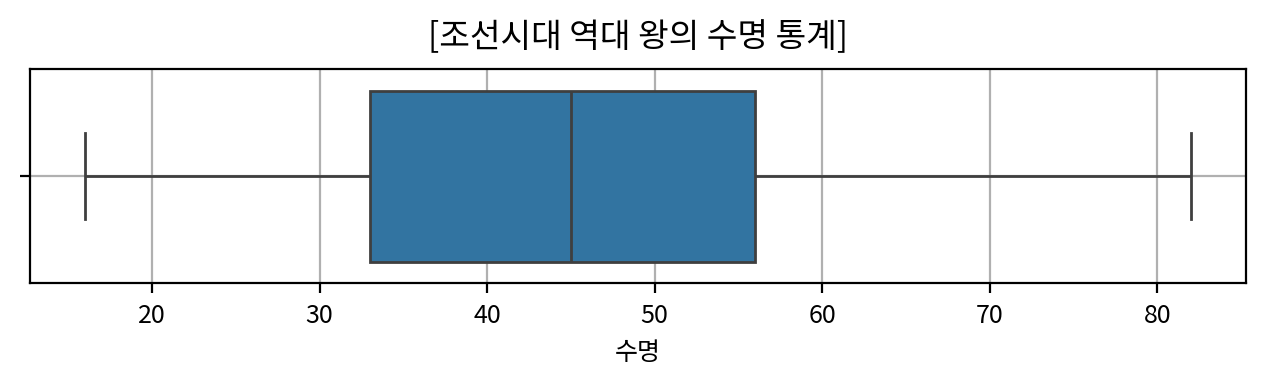

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data =df, x = '수명')

# 3) 그래프 꾸미기: 
ax.set_title("[조선시대 역대 왕의 수명 통계]", 
             pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

기술통계량 및 boxplot으로 알 수 있는 사실들:
- 총 27명의 역대 왕 수명 데이터에서 평균(≒ 46.04세)은 중앙값(45세)보다 살짝 큰 값을 보여주고 이는 이상치 까지는 아니지만(boxplot으로 확인됨) 큰 값이 존재함을 의미하고 양의 꼬리를 가짐을 보여준다.
- 3사분위수(56)와 1사분위수(33)의 차이는 17인데, 역대 조선시대 왕들의 절반의 수명이 33세~56세 사이에 있음을 말해준다.
- 그리고 나이의 최소값(16세)과 최댓값(82세) 끼리의 차이가 64인 점과 표준편차가 ≒ 16.17 인 것으로 미루어 보아 왕들의 수명은 분산이 크다는 걸 알 수 있다.

나이대를 히스토그램화 하면 나이 구간 별 카운트 갯수 더 디테일하게 원인 알 수 듯? bins 갯수만 함 정해보자

데이터가 27개 즉 50 미만이니 bins는 5~7로 설정 ㄱㄱ

histogram:

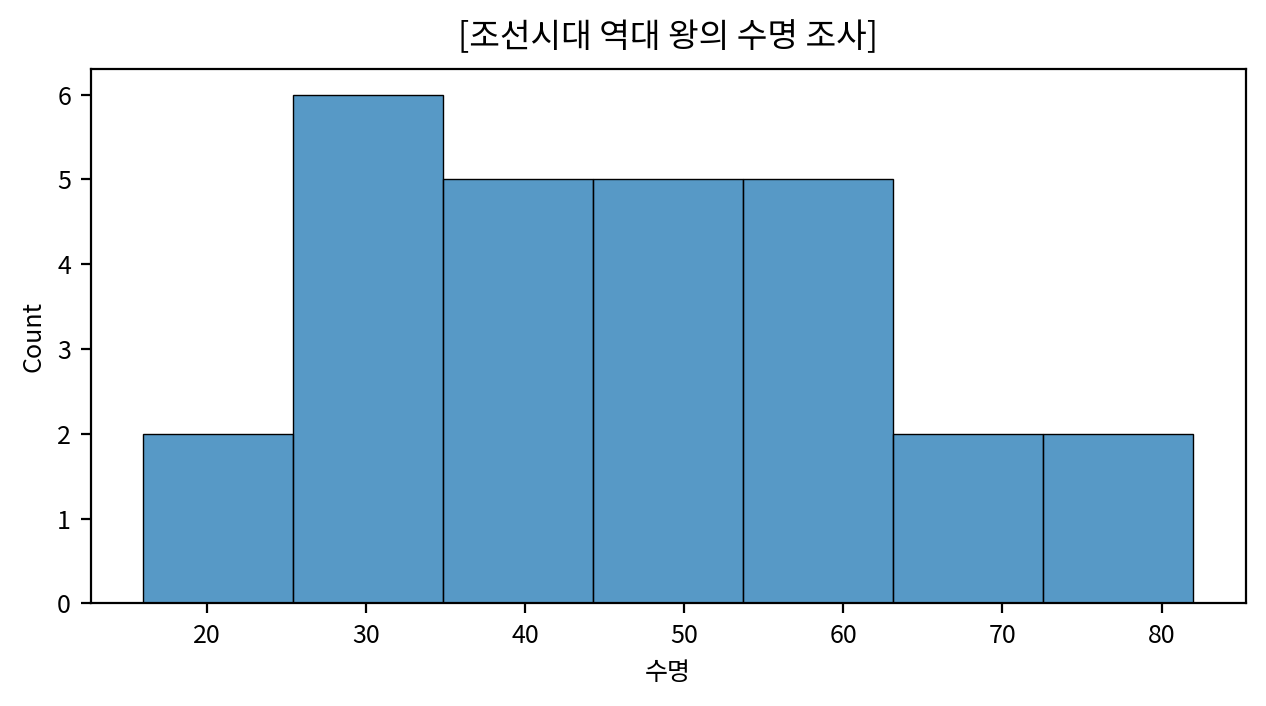

In [ ]:
#mybins = [15, 30, 45, 60, 75, 90]

# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) Histogram 그리기
sb.histplot(data = df, x = '수명', bins = 7,
           edgecolor = "#000000", linewidth = 0.5)

# 3) 그래프 꾸미기: 
ax.set_title("[조선시대 역대 왕의 수명 조사]", pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료

### 문제 2:
`stock` 데이터셋은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터의 일부이다.
외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [ ]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import DataFrame
from pandas import melt
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
origin = load_data('stock')
origin

[data] https://data.hossam.kr/data/lab06/stock.xlsx
[desc] 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [ ]:
kdf = origin.query("구분 == 'K'")
fdf = origin.query("구분 == 'F'")

kdf

,구분,주가
1,K,165
2,K,147
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
15,K,173
19,K,173
21,K,145


In [ ]:
fdf

,구분,주가
0,F,120
3,F,144
9,F,147
10,F,235
11,F,161
12,F,139
13,F,150
14,F,157
16,F,139
17,F,150


In [ ]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

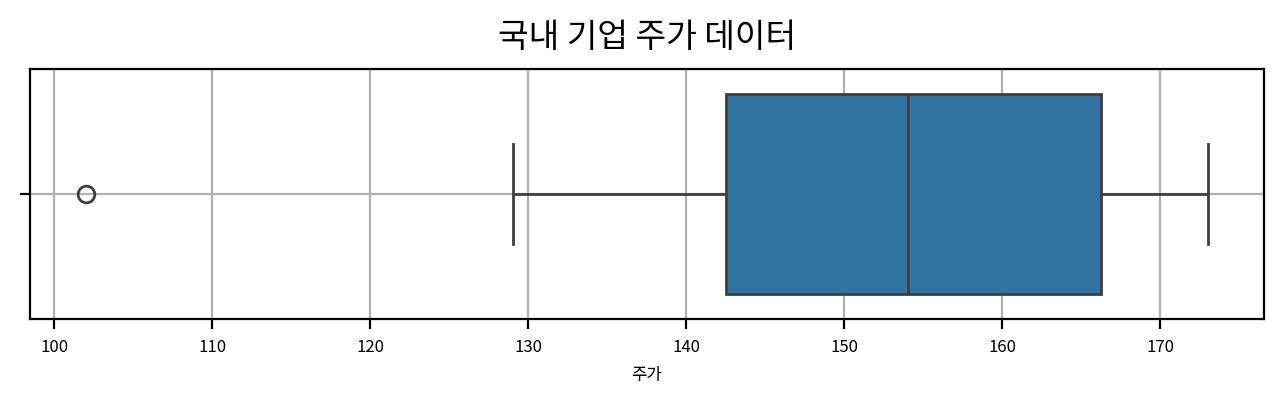

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = kdf, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("국내 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

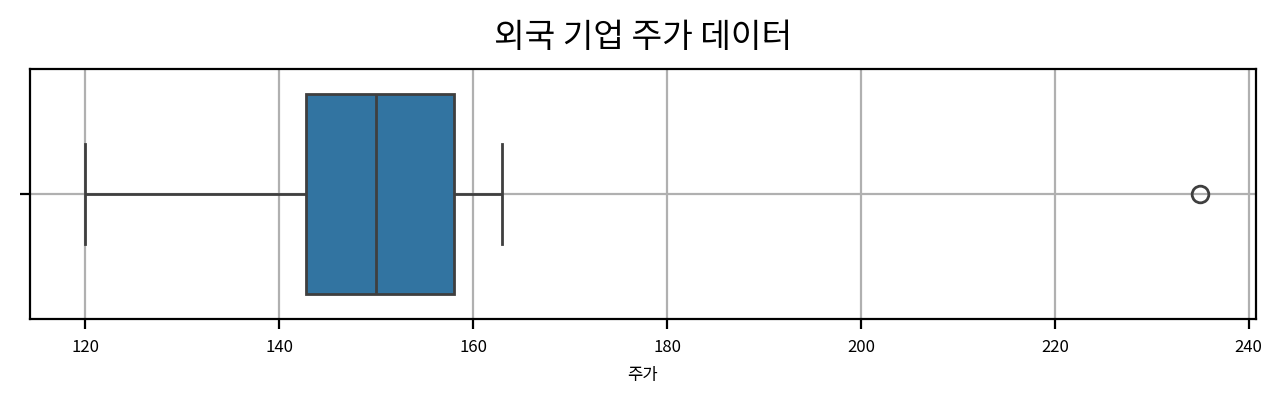

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = fdf, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("외국 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

국내랑 외국 둘다 이상치 있으니, 두 데이터프레임 다 이상치 정제 한 후에 subplot화 시키자

In [ ]:
kdf1 = kdf.copy()
kQ1 = kdf1['주가'].quantile(0.25)
kQ3 = kdf1['주가'].quantile(0.75)
k_outline_min = kQ1 - (kQ3 - kQ1) * 1.5

fdf1 = fdf.copy()
fQ1 = fdf1['주가'].quantile(0.25)
fQ3 = fdf1['주가'].quantile(0.75)
f_outline_max = fQ3 + (fQ3 - fQ1) * 1.5
f_outline_min = fQ1 - (fQ3 - fQ1) * 1.5

In [ ]:
kdf1.loc[kdf1['주가'] < k_outline_min, '주가'] = np.nan
kdf1

,구분,주가
1,K,165.0
2,K,147.0
4,K,135.0
5,K,161.0
6,K,NaN
7,K,165.0
8,K,170.0
15,K,173.0
19,K,173.0
21,K,145.0


In [ ]:
fdf1.loc[fdf1['주가'] > f_outline_max, '주가'] = np.nan
fdf1

,구분,주가
0,F,120.0
3,F,144.0
9,F,147.0
10,F,NaN
11,F,161.0
12,F,139.0
13,F,150.0
14,F,157.0
16,F,139.0
17,F,150.0


In [ ]:
a = kdf1['주가'].mean()
a

np.float64(155.27272727272728)

In [ ]:
kdf2 = DataFrame(kdf1['주가'].fillna(value = a).round(1))
kdf2

,주가
1,165.0
2,147.0
4,135.0
5,161.0
6,155.3
7,165.0
8,170.0
15,173.0
19,173.0
21,145.0


In [ ]:
b = fdf1['주가'].mean()

fdf2 = DataFrame(fdf1['주가'].fillna(value = b).round(1))
fdf2

,주가
0,120.0
3,144.0
9,147.0
10,147.9
11,161.0
12,139.0
13,150.0
14,157.0
16,139.0
17,150.0


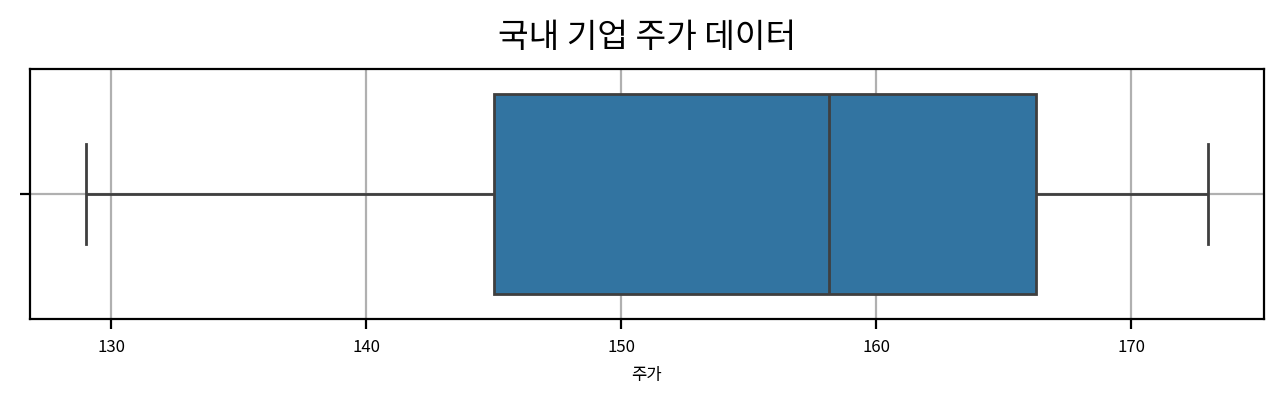

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = kdf2, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("국내 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

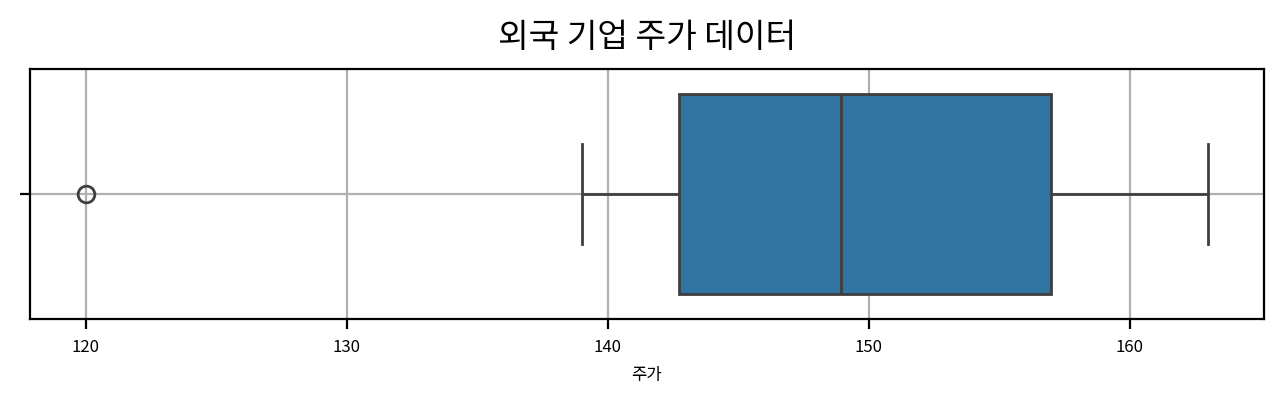

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = fdf2, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("외국 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

In [ ]:
kdf2.describe()

,주가
count,12.000000
mean,155.275000
std,14.918514
min,129.000000
25%,145.000000
50%,158.150000
75%,166.250000
max,173.000000


In [ ]:
fdf2.describe()

,주가
count,12.000000
mean,147.908333
std,11.781762
min,120.000000
25%,142.750000
50%,148.950000
75%,157.000000
max,163.000000


비교/분석:
- 주가 평균값은 국내(155.275)가 해외(≒147.91)보다 조금 더 큰 값을 보이고
- 주가 중앙값 또한 국내(158.15)가 해외(≒148.95)보다 큰 값을 보이고 있다.
- 해외, 국내 모두 평균값이 중앙값 보다 작은 것으로 미루어 보았을 때 주가 그래프는 왼쪽에 꼬리가 위치해 있음을 알 수 있다. 
- 표준편차는 국내(≒14.92)가 해외(≒11.78) 보다 크다.
- 데이터의 절반이 분포 되어 있는 구간은 국내는 145.0에서 166.25 사이로 사분위 수 구간의 크기는 25, 해외는 142.75에서 157 사이로 사분위 수 구간의 크기는 14.25이다. 
- 최솟값과 최댓값의 차이는 국내는 44, 해외는 43으로 비슷한 차이를 보이고 있다.

알 수 있는 사실들:
- 위의 내용으로 알 수 있는 사실은 해외의 주가 데이터가 더 고르게 분포되어 있음을 있음과
- 국내, 해외 상관 없이 주가 그래프는 왼쪽에 꼬리가 위치해 있음을 알 수 있다. 

### 문제 3: 
`grape` 데이터셋은 포도농장에서 수집한 비료 종류에 따른 수확량 자료이다. 
비료 종류별로 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [ ]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import DataFrame
from pandas import pivot_table
from pandas import melt
import numpy as np

In [ ]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 12          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [ ]:
origin = load_data('grape')
origin.head()

[data] https://data.hossam.kr/data/lab06/grape.xlsx
[desc] 포도농장에서 수집한 비료 종류에 따른 수확량 자료 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8


In [ ]:
df_A = origin.query('비료종류 == "A"')
df_B = origin.query('비료종류 == "B"')

df_A

,비료종류,수확량
0,A,39.3
2,A,26.6
3,A,23.7
5,A,28.5
6,A,24.2
7,A,17.9
10,A,24.3


In [ ]:
df_B

,비료종류,수확량
1,B,11.4
4,B,25.8
8,B,16.5
9,B,21.1


In [ ]:
df_A.describe()

,수확량
count,7.000000
mean,26.357143
std,6.578211
min,17.900000
25%,23.950000
50%,24.300000
75%,27.550000
max,39.300000


In [ ]:
df_B.describe()

,수확량
count,4.00000
mean,18.70000
std,6.17252
min,11.40000
25%,15.22500
50%,18.80000
75%,22.27500
max,25.80000


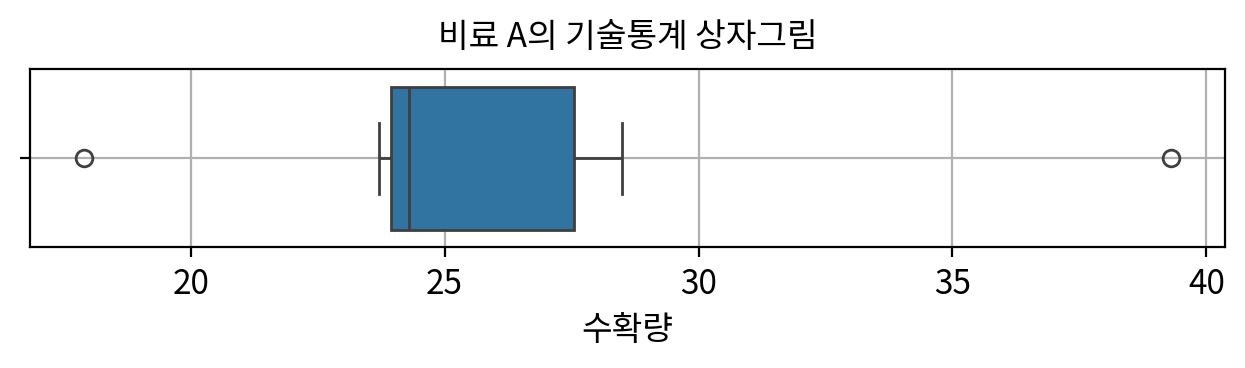

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = df_A, x = '수확량')

# 3) 그래프 꾸미기: 
ax.set_title("비료 A의 기술통계 상자그림", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

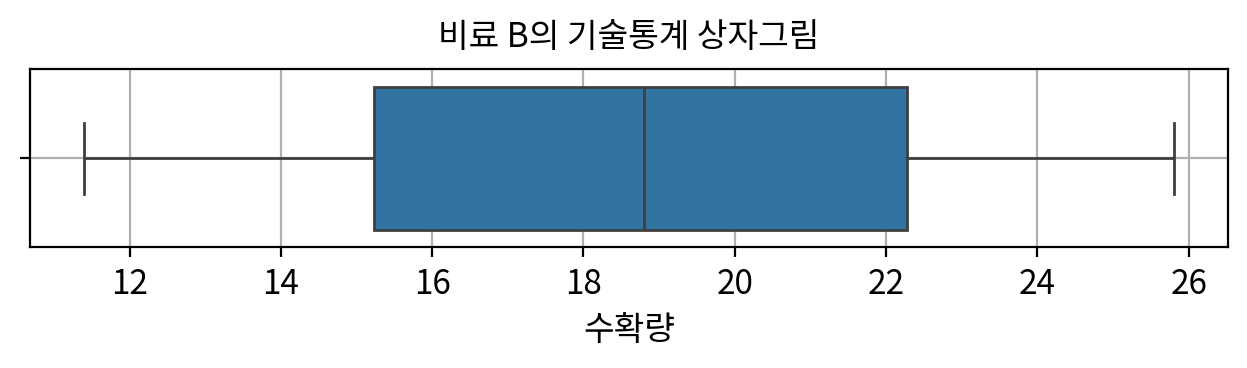

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = df_B, x = '수확량')

# 3) 그래프 꾸미기: 
ax.set_title("비료 B의 기술통계 상자그림", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

In [ ]:
# 이상치가 있는 비료A의 이상치 정제하기

df_A1 = df_A.copy()
aQ1 = df_A1['수확량'].quantile(0.25)
aQ3 = df_A1['수확량'].quantile(0.75)
a_outline_max = aQ3 + (aQ3 - aQ1) * 1.5
a_outline_min = aQ1 - (aQ3 - aQ1) * 1.5

df_A1.loc[df_A1['수확량'] > a_outline_max, '수확량'] = np.nan
df_A1.loc[df_A1['수확량'] < a_outline_min, '수확량'] = np.nan
meanA = df_A1['수확량'].mean()

df_A2 = DataFrame(df_A1['수확량'].fillna(value = meanA).round(1))
df_A2

,수확량
0,25.5
2,26.6
3,23.7
5,28.5
6,24.2
7,25.5
10,24.3


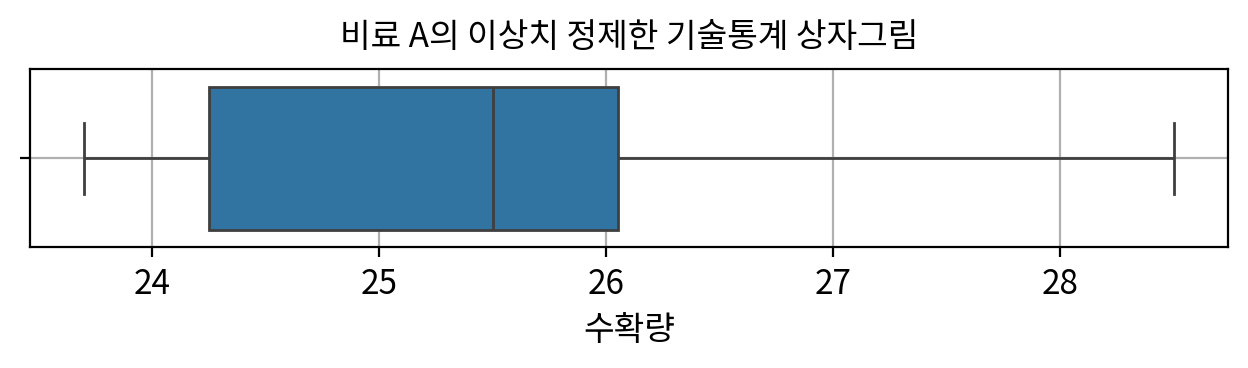

In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = df_A2, x = '수확량')

# 3) 그래프 꾸미기: 
ax.set_title("비료 A의 이상치 정제한 기술통계 상자그림", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

In [ ]:
df_A2.describe()

,수확량
count,7.000000
mean,25.471429
std,1.662041
min,23.700000
25%,24.250000
50%,25.500000
75%,26.050000
max,28.500000


In [ ]:
df_B.describe()

,수확량
count,4.00000
mean,18.70000
std,6.17252
min,11.40000
25%,15.22500
50%,18.80000
75%,22.27500
max,25.80000


-> 알 수 있는 사실:
- 비료 A, B 둘 다에서 수확량의 평균값은 각각의 중앙값 보다 소숫점 단위 수준에서 작음을 보이고
- 비료 A의 평균 수확량(≒25.47)은 B의 평균 수확량(≒18.7)보다 높음을 보여준다.
- 이상치 처리 전 기술통계로 상자그림을 나타내 보았을 때, 비료 A에서만 이상치가 있음을 보여주었다
- 하여 비료 A에서 이상치를 처리하여 다시 기술통계 및 상자그림을 출력해 본 결과, 이상치 처리 전 두 종류의 비료의 표준편차 차이(A:≒6.58, B:≒6.17)보다 이상치 처리 후 표준편차 차이(A:≒1.66, B:≒6.17)가 더 심해진 것으로 나타났다.
- 이는 애초에 `grape` 원본데이터의 모수가 현저히 작음에서 기인한 것으로 보이는데 (A: 7개, B: 5개), 표본의 갯수가 모집단의 성격을 대변할 만큼 되지 않기 때문이다. 

### 문제 4:
`analysis_grade` 데이터셋은 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [ ]:
grade = load_data('analysis_grade')
grade.head()

[data] https://data.hossam.kr/data/lab06/analysis_grade.xlsx
[desc] 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67


In [ ]:
a_grade = grade.query("학과 == 'A'")
a_grade

,학과,점수
1,A,52
2,A,37
4,A,67
6,A,73
9,A,15
11,A,18
12,A,23
13,A,10
15,A,39
18,A,41


In [ ]:
c_grade = grade.query("학과 == 'C'")
c_grade

,학과,점수
0,C,54
3,C,41
5,C,43
7,C,51
8,C,55
10,C,52
14,C,48
16,C,51
17,C,82
24,C,90


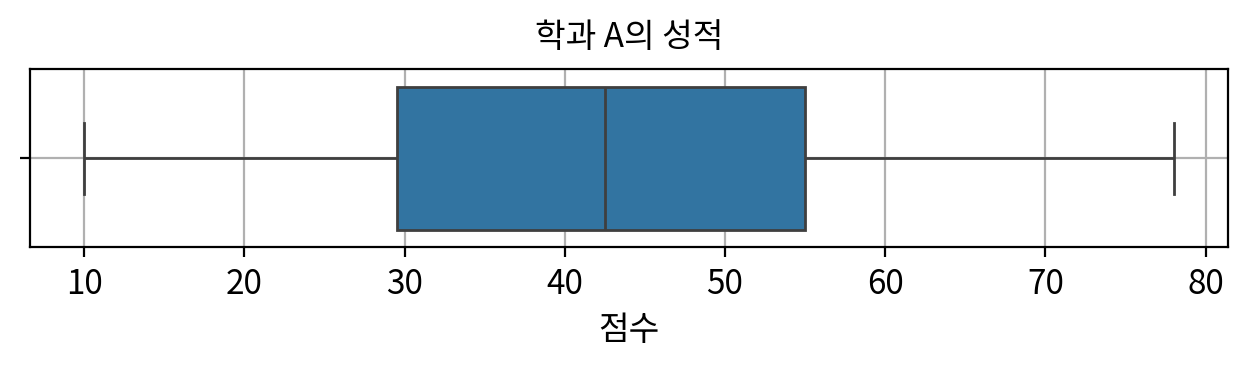

,점수
count,20.000000
mean,43.750000
std,20.229928
min,10.000000
25%,29.500000
50%,42.500000
75%,55.000000
max,78.000000


In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = a_grade, x = '점수')

# 3) 그래프 꾸미기: 
ax.set_title("학과 A의 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

a_grade.describe()

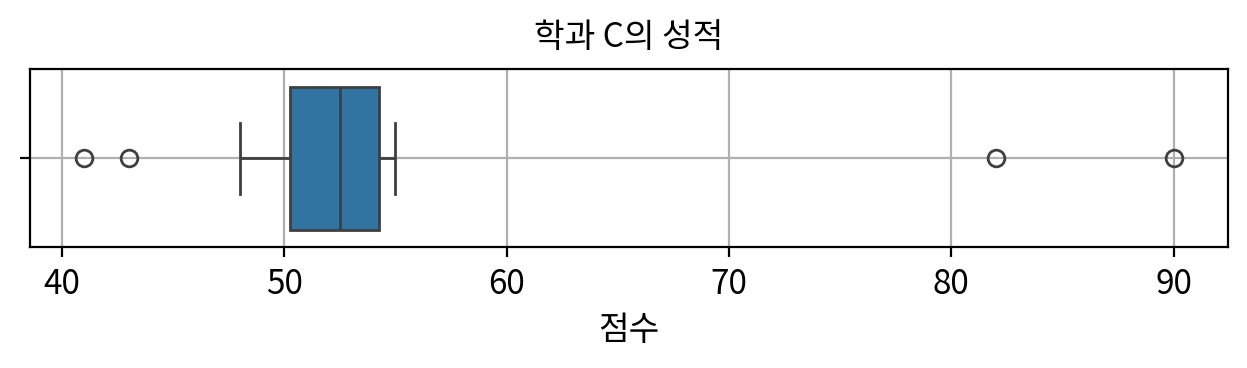

,점수
count,12.000000
mean,56.166667
std,14.689720
min,41.000000
25%,50.250000
50%,52.500000
75%,54.250000
max,90.000000


In [ ]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = c_grade, x = '점수')

# 3) 그래프 꾸미기: 
ax.set_title("학과 C의 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

c_grade.describe()

-> 알 수 있는 사실:
1. C 학과에서 이상치 처리 하기엔... 
  - 이상치가 없는 A 학과보다도 표본이 작고, 
  - C학과 총 12명 중 이상치가 4명으로 나왔고, 
  - 이상치 처리를 고려할 만한 표본집단 모수도 되지 않기 떄문에 이상치 처리를 하지 않은 상태로 해석해야 할 것 같다.
2.  

### 문제 5:
`stat_comp_grade` 데이터셋은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.
1. 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.
2. 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
3. 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
4. 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [3]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import melt
import numpy as np

In [22]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 12          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [6]:
origin = load_data('stat_comp_grade')
origin

[data] https://data.hossam.kr/data/lab06/stat_comp_grade.xlsx
[desc] 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [ ]:
df = origin.replace({'전공': 'STAT'}, 1)
df2 = df.replace({'전공':'COMP'}, 2)
df2

C:\Users\itwill\AppData\Local\Temp\ipykernel_10664\2708505694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df.replace({'전공':'COMP'}, 2)


,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


In [35]:
df2['중간고사'].astype(int)
df2['기말고사'].astype(int)
# df2.info()
major1 = df2.query("전공 == 1")
major2 = df2.query("전공 == 2")

mid = df2['중간고사']
final = df2['기말고사']

In [34]:
mid.describe()

count    20.000000
mean     65.150000
std      19.647619
min      31.000000
25%      48.500000
50%      67.500000
75%      78.500000
max      94.000000
Name: 중간고사, dtype: float64

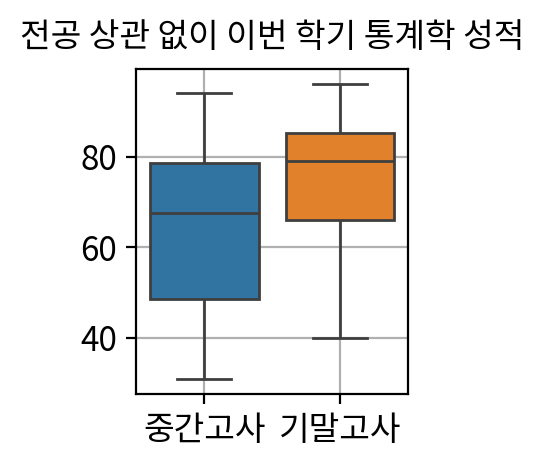

,중간고사,기말고사
count,20.000000,20.000000
mean,65.150000,75.650000
std,19.647619,15.597824
min,31.000000,40.000000
25%,48.500000,66.000000
50%,67.500000,79.000000
75%,78.500000,85.250000
max,94.000000,96.000000


In [48]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 400             # 그래프 가로 크기
height_px = 500             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df2[['중간고사', '기말고사']])

# 3) 그래프 꾸미기: 
ax.set_title("전공 상관 없이 이번 학기 통계학 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

df2.drop('전공', axis=1).describe()

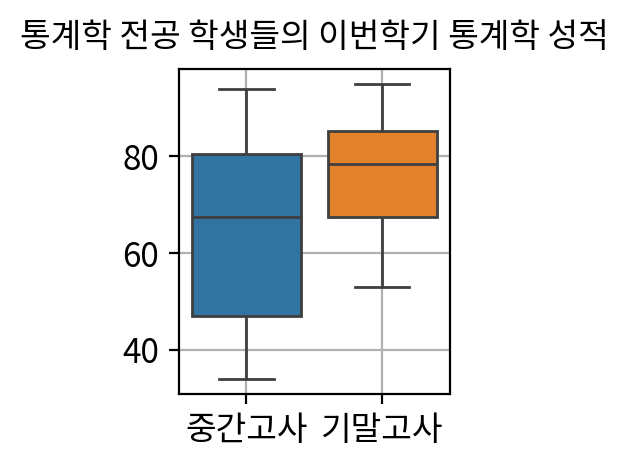

,전공,중간고사,기말고사
count,12.0,12.000000,12.000000
mean,1.0,64.833333,76.166667
std,0.0,21.225342,13.953386
min,1.0,34.000000,53.000000
25%,1.0,47.000000,67.500000
50%,1.0,67.500000,78.500000
75%,1.0,80.500000,85.250000
max,1.0,94.000000,95.000000


In [49]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 400             # 그래프 가로 크기
height_px = 500             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = major1[['중간고사', '기말고사']])

# 3) 그래프 꾸미기: 
ax.set_title("통계학 전공 학생들의 이번학기 통계학 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

major1.describe()

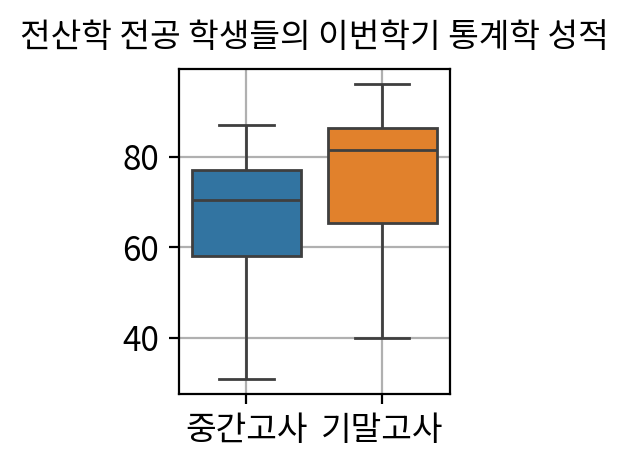

,전공,중간고사,기말고사
count,8.0,8.000000,8.000000
mean,2.0,65.625000,74.875000
std,0.0,18.423103,18.795421
min,2.0,31.000000,40.000000
25%,2.0,58.000000,65.250000
50%,2.0,70.500000,81.500000
75%,2.0,77.000000,86.250000
max,2.0,87.000000,96.000000


In [50]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 400             # 그래프 가로 크기
height_px = 500             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = major2[['중간고사', '기말고사']])

# 3) 그래프 꾸미기: 
ax.set_title("전산학 전공 학생들의 이번학기 통계학 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

major2.describe()

-> 알 수 있는 사실:
- 전공 상관 없이 평균점수만 놓고 봤을 때는 이번 학기 중간고사보다 기말고사가 더 어려웠다
- 중간고사: 통계학 과목인데도 불구하고 통계학 전공 학생들보다 전산학 전공 학생들이 시험 더 잘봤다 (통계학 빠가..?)
  - 왜그런가 봤더니,, 통계학 전공 학생 중 일부가 점수가 개판이여서 평균 까내렸네 (30~40점대 학생 수: 통계학과 (4명), 전산학과(2명))
- 기말고사: 통계 전공 학생들이 긁혔는지 기말에선 전산학 학생들보다 평균 점수 더 높임
  - 중간 때 30~40점대 맞은 통계 전공 학생들이 기말 때 4명 다 성적 올렸고 (34 -> 86, 47 -> 57, 38 -> 53, 47 -> 60) 그 중엔 50점 이상 올린 학생도 있었음
  - 중간 때 30~40점대 맞은 전산학 전공 학생들도 기말 때 성적 올리긴 했는데 (2: 31 -> 68, 49 -> 57) 
  - 아무래도 통계전공 학생 중 기말에서 50점 이상 올린 학생의 영향이 좀 컸던 거 같다 (ㄹㅇ 빡공했나보네 ㅎ)